# Checkpoint 1

### Eduardo Ferreira, 2024
### eduds1010@gmail.com


## Carregar módulos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Carregar dados

In [ ]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
path_dead =  'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [ ]:
dados_paises_covid = pd.read_csv(path)
dados_paises_covid_dead = pd.read_csv(path_dead)

In [ ]:
dados_paises_covid

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


## Ajustes



- Nomes das colunas

In [ ]:
dados_paises_covid.rename(columns={"Province/State": "province",
                                   "Country/Region": "country"},
                          inplace=True)

In [ ]:
dados_paises_covid_dead.rename(columns={"Province/State": "province",
                                        "Country/Region": "country"},
                               inplace=True)

In [ ]:
dados_paises_covid_dead.columns

Index(['province', 'country', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)

- Reajustar dados

In [ ]:
dados_paises_covid = dados_paises_covid.melt(id_vars=['province', 'country', 'Lat', 'Long'],
                                             var_name = 'date',
                                             value_name = 'infected')

In [ ]:
dados_paises_covid_dead = dados_paises_covid_dead.melt(id_vars=['province', 'country', 'Lat', 'Long'],
                                                       var_name = 'date',
                                                       value_name = 'dead')

In [ ]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
330322,NaN,West Bank and Gaza,31.952200,35.233200,3/9/23,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,3/9/23,0
330324,NaN,Yemen,15.552727,48.516388,3/9/23,2159
330325,NaN,Zambia,-13.133897,27.849332,3/9/23,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,3/9/23,5671


In [ ]:
dados_paises_covid_dead.dtypes

province     object
country      object
Lat         float64
Long        float64
date         object
dead          int64
dtype: object



```
# Isto está formatado como código
```

- Ajustar datas

In [ ]:
dados_paises_covid['date'] = pd.to_datetime(dados_paises_covid['date'],
                                            infer_datetime_format='True')

In [ ]:
dados_paises_covid_dead['date'] = pd.to_datetime(dados_paises_covid_dead['date'],
                                                 infer_datetime_format='True')

In [ ]:
dados_paises_covid.tail()

,province,country,Lat,Long,date,infected
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,703228
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,535
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,11945
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,343135
330326,NaN,Zimbabwe,-19.015438,29.154857,2023-03-09,264276


In [ ]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,0
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,2159
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,2023-03-09,5671


In [ ]:
dados_paises_covid_dead.dtypes

province            object
country             object
Lat                float64
Long               float64
date        datetime64[ns]
dead                 int64
dtype: object

- Combinar os datasets

In [ ]:
dados_paises_covid.shape

(330327, 6)

In [ ]:
dados_paises_covid_dead.shape

(330327, 6)

In [ ]:
dados_covid = pd.merge(dados_paises_covid, dados_paises_covid_dead,
                       on = ['province', 'country',	'Lat',	'Long',	'date'],
                       how = 'inner')

In [ ]:
dados_covid.head()

,province,country,Lat,Long,date,infected,dead
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0


In [ ]:
dados_covid.shape

(330327, 7)

## Aqui começa o trabalho

## Questão 1

In [ ]:
dados_covid['date'].max()

Timestamp('2023-03-09 00:00:00')

In [ ]:
#Quantos países existem no banco de dados?
#Agrupando a categoria "country" por valores iguais temos a lista de "países".
#Usamos a média de mortos e infectados apenas para ajudar na visualização.
#A tabela tem 201 colunas.
#Excluímos os seguintes valores que não são países: Antarctica, Diamond Princess, Holy See, MS Zaandam, Summer Olympics 2020, Winter olympics 2022
#São 195 países.
#Consideramos "West Bank and Gaza" como sendo o país Palestina.

dados_covid_atualizados = dados_covid[dados_covid['date'] == '2023-03-09']
dados_covid_atualizados = dados_covid_atualizados.groupby('country').agg(total_mortos = pd.NamedAgg('dead', 'sum'), total_infectados = pd.NamedAgg('infected', 'sum'))
dados_covid_atualizados

,total_mortos,total_infectados
country,,
Afghanistan,7896,209451
Albania,3598,334457
Algeria,6881,271496
Andorra,165,47890
Angola,1933,105288
...,...,...
West Bank and Gaza,5708,703228
Winter Olympics 2022,0,535
Yemen,2159,11945


##Questão 2 e 3

In [ ]:
#total infectados (top 10)
#a seguir o top 10 de infectados, que ja inclui o número de infectados de Brasil, Itália e EUA

dados_covid_atualizados.sort_values('total_infectados', ascending = False).head(10)

,total_mortos,total_infectados
country,,
US,1123836,103802702
India,530779,44690738
France,166176,39866718
Germany,168935,38249060
Brazil,699276,37076053
Japan,72997,33320438
"Korea, South",34093,30615522
Italy,188322,25603510
United Kingdom,220721,24658705


In [ ]:
#total mortos (top 10)

dados_covid_atualizados.sort_values('total_mortos', ascending = False).head(10)

,total_mortos,total_infectados
country,,
US,1123836,103802702
Brazil,699276,37076053
India,530779,44690738
Russia,388478,22075858
Mexico,333188,7483444
United Kingdom,220721,24658705
Peru,219539,4487553
Italy,188322,25603510
Germany,168935,38249060


##Questão 4

In [ ]:
#taxa de mortalidade
#Quais os 10 países que  possuem  maiores  valores  desta  taxa?
#a seguir, o top 11, então basta excluir a linha "MS Zaandam", que não é um país

dados_covid_atualizados['taxa mortalidade'] = dados_covid_atualizados['total_mortos'] / dados_covid_atualizados['total_infectados']
dados_covid_atualizados.sort_values('taxa mortalidade', ascending = False).head(11)

,total_mortos,total_infectados,taxa mortalidade
country,,,
"Korea, North",6,1,6.000000
MS Zaandam,2,9,0.222222
Yemen,2159,11945,0.180745
Sudan,5017,63829,0.078601
Syria,3164,57467,0.055058
Somalia,1361,27324,0.049810
Peru,219539,4487553,0.048922
Egypt,24812,515759,0.048108
Mexico,333188,7483444,0.044523


##Questão 5

<Axes: xlabel='date'>

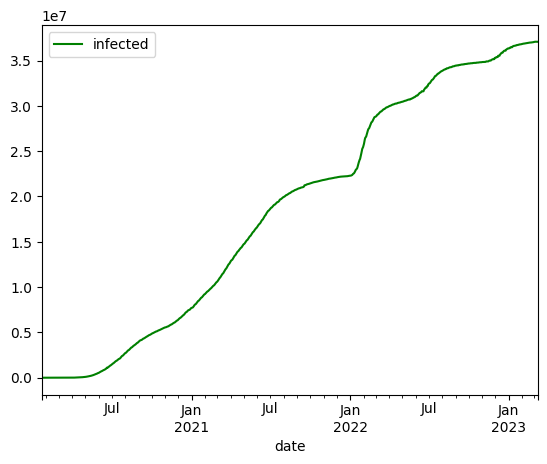

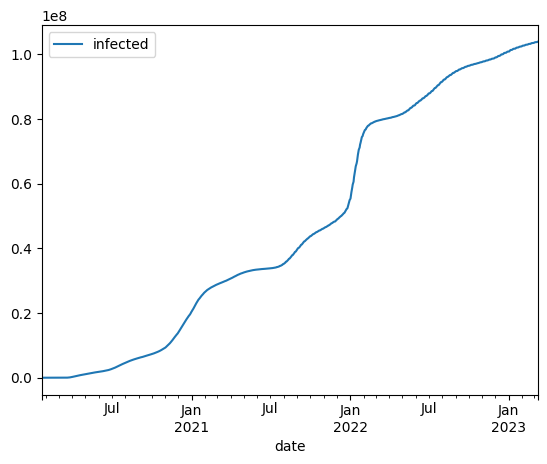

In [ ]:
#a)Gráfico  de  linhas  contendo  a  evolução  do  número  de  infectados  do  Brasil e Estados Unidos
dados_covid_brasil = dados_covid[dados_covid['country'] == 'Brazil']
dados_covid_US = dados_covid[dados_covid['country'] == 'US']

dados_covid_brasil.plot.line(x = 'date', y = 'infected', color = 'g')
dados_covid_US.plot.line(x = 'date', y = 'infected')

<Axes: xlabel='date'>

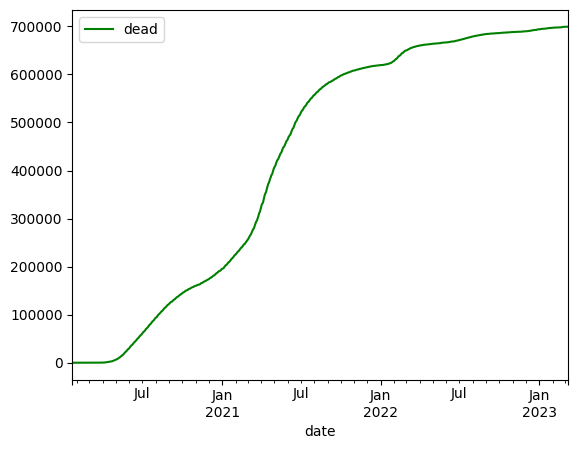

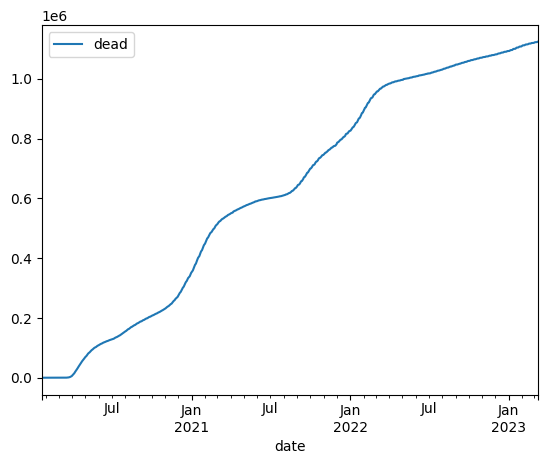

In [ ]:
#b)Gráfico de linhas contendo a evolução do número de mortos do Brasil e Estados Unidos.

dados_covid_brasil.plot.line(x = 'date', y = 'dead', color = 'g')
dados_covid_US.plot.line(x = 'date', y = 'dead')

<Axes: xlabel='country'>

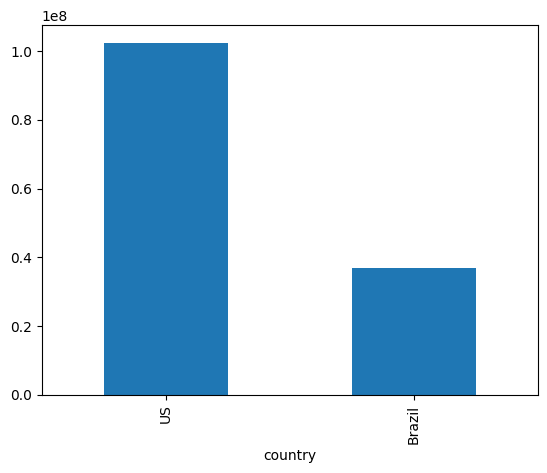

In [ ]:
#c)Gráfico de barras comparando o número de infectadosde Brasil e Estados Unidos em 01/fev/2023

dados_covid_010223 = dados_covid[dados_covid['date'] == '2023-02-01']
dados_covid_010223_Brazil_US = dados_covid_010223[dados_covid_010223['country'].isin(['Brazil', 'US'])]
dados_covid_010223_Brazil_US.sort_values('infected', ascending = False) \
            .plot.bar(x = 'country', y = 'infected', legend = None)

<Axes: xlabel='country'>

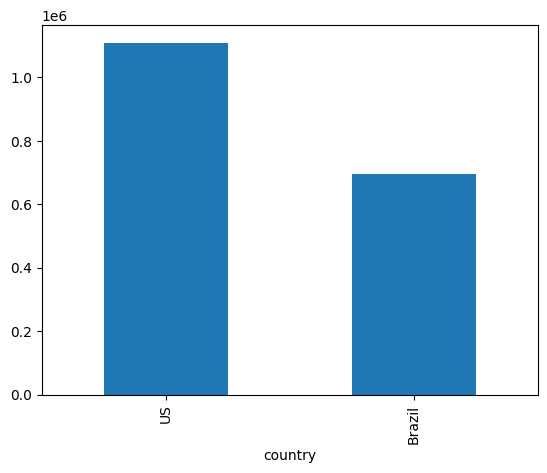

In [ ]:
#d)Gráfico  de  barras  comparando  o  número  de  mortos  de  Brasil  e Estados  Unidos  em 01/fev/2023

dados_covid_010223 = dados_covid[dados_covid['date'] == '2023-02-01']
dados_covid_010223_Brazil_US = dados_covid_010223[dados_covid_010223['country'].isin(['Brazil', 'US'])]
dados_covid_010223_Brazil_US.sort_values('dead', ascending = False) \
            .plot.bar(x = 'country', y = 'dead', legend = None)

<ipython-input-158-72ae5b04fd3e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_covid_010223_Brazil_US ['taxa mortalidade'] = dados_covid_010223_Brazil_US['dead'] / dados_covid_010223_Brazil_US['infected']


<Axes: xlabel='country'>

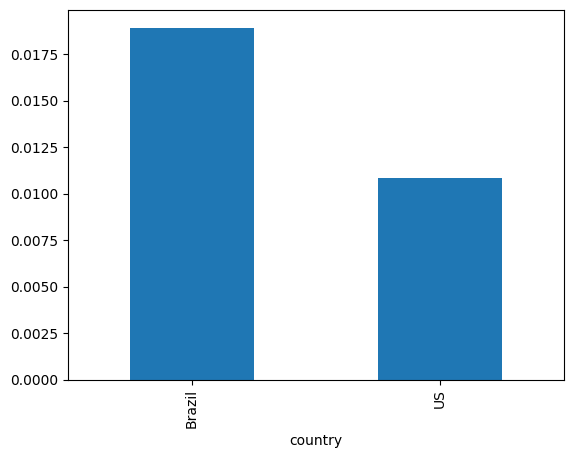

In [ ]:
#e)Gráfico  de  barras  comparando  a  taxa  de  mortalidade  de  Brasil  e Estados  Unidos em 01/fev/2023

dados_covid_010223_Brazil_US ['taxa mortalidade'] = dados_covid_010223_Brazil_US['dead'] / dados_covid_010223_Brazil_US['infected']
dados_covid_010223_Brazil_US.sort_values('taxa mortalidade', ascending = False) \
            .plot.bar(x = 'country', y = 'taxa mortalidade', legend = None)